In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
from imblearn.over_sampling import SMOTE

from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [2]:
wine_data = pd.read_csv('winequality-red.csv')

In [3]:
wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
wine_data.shape

(1599, 12)

In [5]:
wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [6]:
# Check null values
wine_data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [7]:
wine_data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [8]:
wine_data.value_counts('quality')

quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64

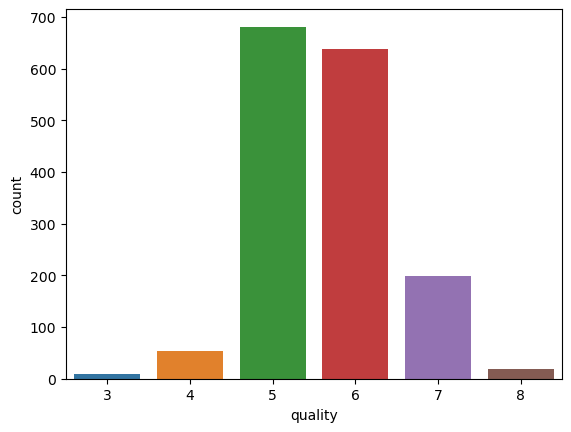

In [9]:
sns.countplot(x='quality', data=wine_data)
plt.show()

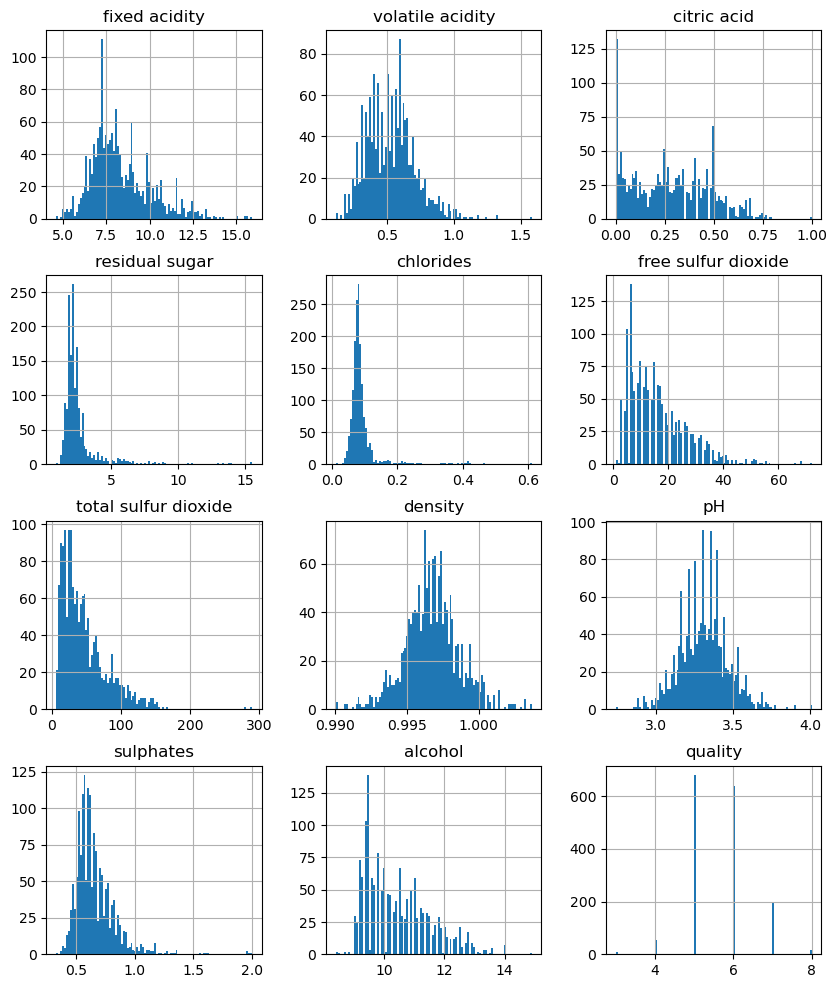

In [10]:
wine_data.hist(bins=100, figsize=(10, 12))
plt.show()

The wines which have a quality greater than 6.5 are considered as good quality wines.

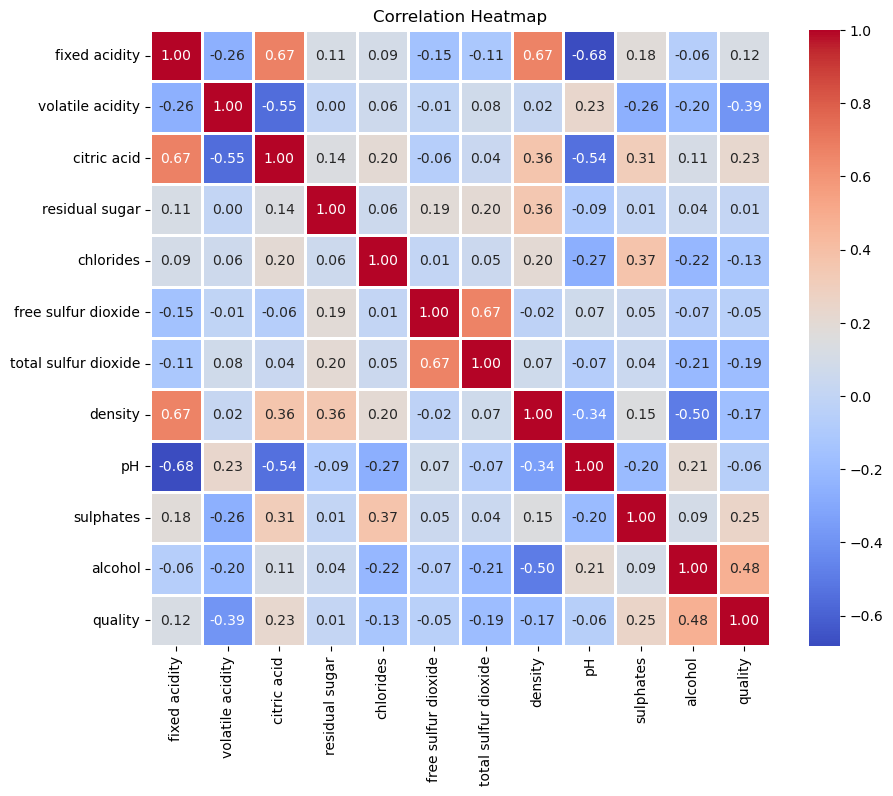

In [11]:
# Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(wine_data.corr(), annot=True, fmt = "0.2f", cmap='coolwarm', linewidths=2)
plt.title('Correlation Heatmap')
plt.show()

"Alcohol" has the highest positive correlation with the target variable "Quality". "Volatile Acidity" has the highest negative correlation with the "Quality".

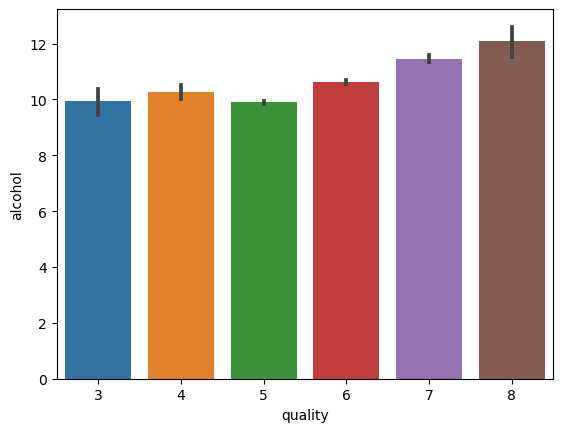

In [12]:
sns.barplot(x='quality', y='alcohol', data=wine_data)
plt.show()

In [77]:
# sns.pairplot(wine_data, hue = 'quality')

### Binarization of target variable

In [13]:
wine_data['quality'].unique()

array([5, 6, 7, 4, 8, 3])

Put 1 if the value is greater than or equal to 7, else 0.

In [14]:
wine_data['quality'] = wine_data['quality'].apply(lambda x: 1 if x >= 7 else 0)

<Axes: xlabel='quality', ylabel='count'>

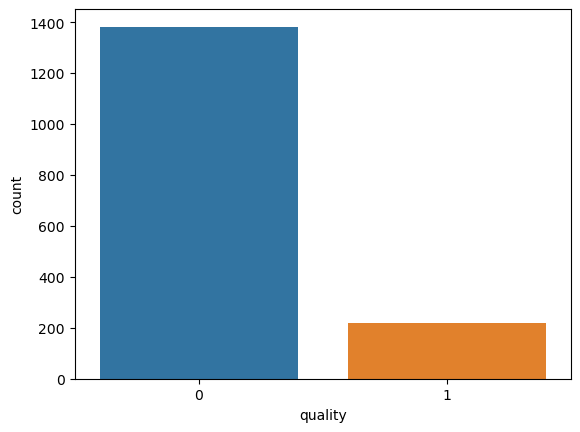

In [72]:
sns.countplot(x = "quality", data = wine_data)

Dataset is imbalanced.
Imbalanced refers to the datasets where the target class has an uneven distribution of observations.

### Handling imbalanced dataset

We can use two techniques. Oversampling and undersampling. We can over sample the minority class using replacement (oversampling). We can randomly delete rows from the majority class to match this with the minority class (undersampling). The disadvantage of undersampling is that we lose a lot of valuable data.  

Oversampling with Synthetic Minority Oversampling Technique. It is one of the most commonly used oversampling methods. It aims to balance class distribution by randomly increasing minority class examples by replacing them. Synthesizes new minority instances between minority instances. Generates virtual training records by linear interpolation for the minority class. The advantage is that you are not generating duplicates but rather creating synthetic data points that are slightly different from the original data points. 

### Store Feature Matrix In X And Response (Target) In Vector y

In [17]:
# Split the data into features and target
X = wine_data.drop('quality', axis = 1)
y = wine_data['quality']

In [18]:
X, y = SMOTE().fit_resample(X, y)

In [76]:
X.shape, y.shape

((2764, 11), (2764,))

### Splitting The Dataset Into The Training Set And Test Set

To evaluate the performance of the models

In [23]:
# Divide the data set into two sets: training and testing
# Train the model on X_train and y_train
# Perform prediction using X_test an compare the predictor result with y_test
# test_size = 0.2 means 20% of the data will be used for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
print("X_train shape: ", X_train.shape)
print("X_test shape: ", X_test.shape)
print("y_train shape: ", y_train.shape)
print("y_test shape: ", y_test.shape)

X_train shape:  (2211, 7)
X_test shape:  (553, 7)
y_train shape:  (2211,)
y_test shape:  (553,)


### Feature Scaling

Feature scaling allows to put features into the same scale

Feature scaling is essential for mchine learning algorithms that calculate distances between data. If not, features with higher value range starts dominating when calculating distances.

In [24]:
# Put the features into the same scale
st = StandardScaler()
X_train = st.fit_transform(X_train)
X_test = st.transform(X_test)

### Applying PCA

Principal component analysis is a dimensionality reduction method often used to reduce the dimensionality of large data sets by transforming a large set of variables into a smaller one that still contains most of the information in the large set. Giving a PCA model a sample with input features, the output is a complete new set of features.

With PCA we can capture whatever information represented by the 11 columns in the data set and represent the same information with two column data set. Model training is very computationally intensive process and few features typically need less resources for training. Reduce the number of variables of a data set while prereserving as much information as possible.

In [25]:
# Specify the number of components
# Let PCA figure it out. Tell PCA how much information it needs to retain as percentage.
# 0.90 means 90% of the information will be retained from the data set
pca = PCA(n_components = 0.90)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [26]:
pca.explained_variance_ratio_

array([0.29324608, 0.18679973, 0.14347346, 0.10383362, 0.08642384,
       0.05850145, 0.04666017])

In [45]:
sum(pca.explained_variance_ratio_)

0.9081771725272516

The target variable is having categorical values 0 for bad quality wine and 1 for good quality wine. This is a classification problem. We are going to us different classification models.

#### Logistic Regression

In [28]:
## Logistic Regression Model
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr_prediction = lr.predict(X_test)

# Accuracy of the model
lr_accuracy = accuracy_score(lr_prediction, y_test)
print("Test accuracy: {:.2f}%".format(lr_accuracy*100))

Test accuracy: 80.65%


In [30]:
# Logistic Regression Classification report
print(classification_report(y_test, lr_prediction))

              precision    recall  f1-score   support

           0       0.85      0.77      0.81       291
           1       0.77      0.84      0.81       262

    accuracy                           0.81       553
   macro avg       0.81      0.81      0.81       553
weighted avg       0.81      0.81      0.81       553



TN:  225
TP:  221
FP:  66
FN:  41


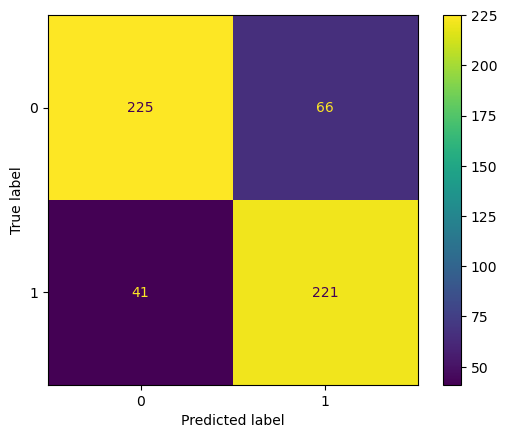

In [32]:
# Confusion matrix
cm = confusion_matrix(y_test, lr_prediction, labels = lr.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = lr.classes_)
disp.plot()
print("TN: ", cm[0, 0])
print("TP: ", cm[1, 1])
print("FP: ", cm[0, 1])
print("FN: ", cm[1, 0])

#### Decision Tree Classifier

In [33]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
dt_predict = dt.predict(X_test)

# Accuracy of the model
dt_accuracy = accuracy_score(dt_predict, y_test)
print("Test accuracy: {:.2f}%".format(dt_accuracy*100))

Test accuracy: 87.70%


In [34]:
# Decision Tree Classification report
print(classification_report(y_test, dt_predict))

              precision    recall  f1-score   support

           0       0.92      0.84      0.88       291
           1       0.83      0.92      0.88       262

    accuracy                           0.88       553
   macro avg       0.88      0.88      0.88       553
weighted avg       0.88      0.88      0.88       553



TN:  243
TP:  242
FP:  48
FN:  20


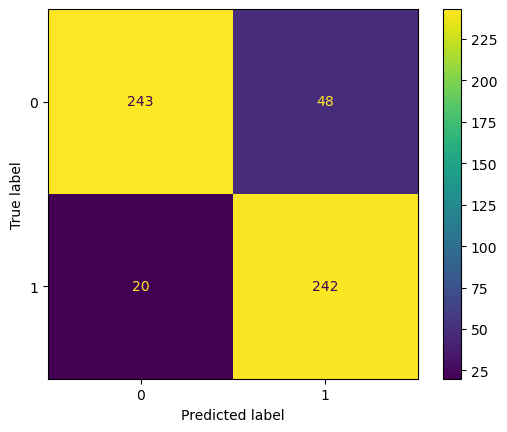

In [39]:
# Confusion matrix
cm = confusion_matrix(y_test, dt_predict, labels = dt.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = dt.classes_)
disp.plot()
print("TN: ", cm[0, 0])
print("TP: ", cm[1, 1])
print("FP: ", cm[0, 1])
print("FN: ", cm[1, 0])

#### Random Forest Classifier

In [36]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf_predict = rf.predict(X_test)

# Accuracy of the model
rf_accuracy = accuracy_score(rf_predict, y_test)
print("Test accuracy: {:.2f}%".format(rf_accuracy*100))

Test accuracy: 91.50%


In [37]:
# Random Forest Classification report
print(classification_report(y_test, rf_predict))

              precision    recall  f1-score   support

           0       0.96      0.88      0.92       291
           1       0.87      0.96      0.91       262

    accuracy                           0.92       553
   macro avg       0.92      0.92      0.92       553
weighted avg       0.92      0.92      0.92       553



TN:  255
TP:  251
FP:  36
FN:  11


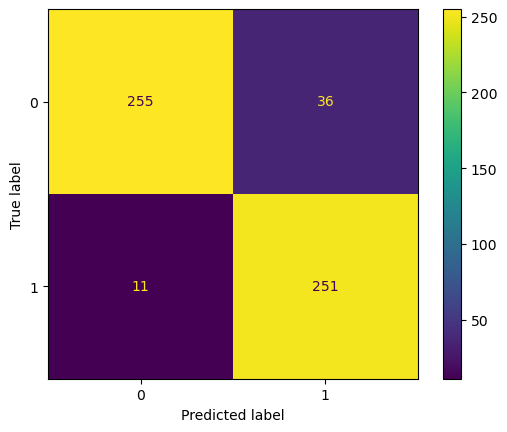

In [40]:
# Confusion matrix
cm = confusion_matrix(y_test, rf_predict, labels = rf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = rf.classes_)
disp.plot()
print("TN: ", cm[0, 0])
print("TP: ", cm[1, 1])
print("FP: ", cm[0, 1])
print("FN: ", cm[1, 0])

#### Support Vector Classifier - SVC

In [41]:
svm = svm.SVC()
svm.fit(X_train, y_train)
svm_predict = svm.predict(X_test)

# Accuracy of the model
svm_accuracy = accuracy_score(svm_predict, y_test) 
print("Test accuracy: {:.2f}%".format(svm_accuracy*100))

Test accuracy: 86.80%


In [42]:
# SVM Classification report
print(classification_report(y_test, svm_predict))

              precision    recall  f1-score   support

           0       0.92      0.82      0.87       291
           1       0.82      0.92      0.87       262

    accuracy                           0.87       553
   macro avg       0.87      0.87      0.87       553
weighted avg       0.87      0.87      0.87       553



TN:  239
TP:  241
FP:  52
FN:  21


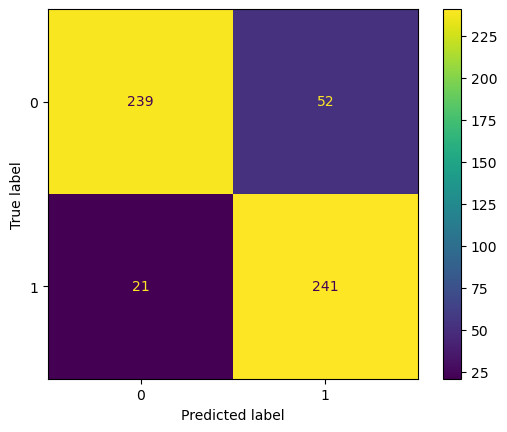

In [43]:
# Confusion matrix
cm = confusion_matrix(y_test, svm_predict, labels = svm.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = svm.classes_)
disp.plot()
print("TN: ", cm[0, 0])
print("TP: ", cm[1, 1])
print("FP: ", cm[0, 1])
print("FN: ", cm[1, 0])

#### K Nearest Neighbours Classifier

In [45]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn_predict = knn.predict(X_test)

# Accuracy of the model
knn_accuracy = accuracy_score(knn_predict, y_test)
print("Test accuracy: {:.2f}%".format(knn_accuracy*100))

Test accuracy: 87.16%


In [46]:
# KNN Classification report
print(classification_report(y_test, knn_predict))

              precision    recall  f1-score   support

           0       0.97      0.78      0.87       291
           1       0.80      0.97      0.88       262

    accuracy                           0.87       553
   macro avg       0.88      0.88      0.87       553
weighted avg       0.89      0.87      0.87       553



TN:  228
TP:  254
FP:  63
FN:  8


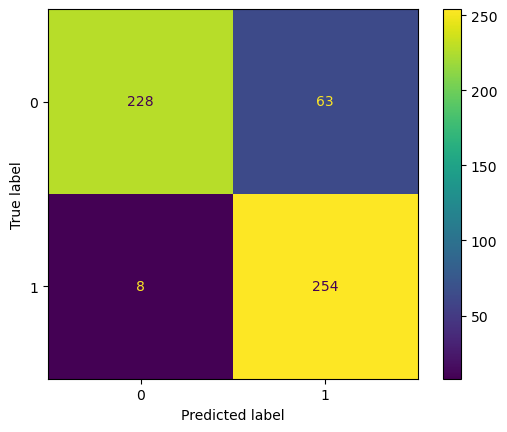

In [47]:
# Confusion matrix
cm = confusion_matrix(y_test, knn_predict, labels = knn.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = knn.classes_)
disp.plot()
print("TN: ", cm[0, 0])
print("TP: ", cm[1, 1])
print("FP: ", cm[0, 1])
print("FN: ", cm[1, 0])

#### Gradient Booster Classifier

In [48]:
gbc = GradientBoostingClassifier()
gbc.fit(X_train, y_train)
gbc_predict = gbc.predict(X_test)

# Accuracy of the model
gbc_accuracy = accuracy_score(gbc_predict, y_test)
print("Test accuracy: {:.2f}%".format(gbc_accuracy*100))

Test accuracy: 88.25%


In [49]:
# Gradient Boosting Classification report
print(classification_report(y_test, gbc_predict))

              precision    recall  f1-score   support

           0       0.92      0.85      0.88       291
           1       0.84      0.92      0.88       262

    accuracy                           0.88       553
   macro avg       0.88      0.88      0.88       553
weighted avg       0.89      0.88      0.88       553



TN:  246
TP:  242
FP:  45
FN:  20


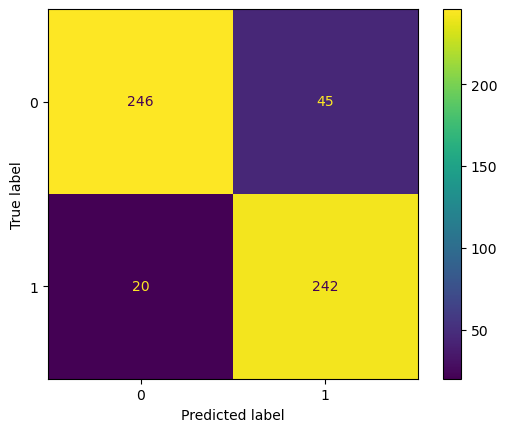

In [50]:
# Confusion matrix
cm = confusion_matrix(y_test, gbc_predict, labels = gbc.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = gbc.classes_)
disp.plot()
print("TN: ", cm[0, 0])
print("TP: ", cm[1, 1])
print("FP: ", cm[0, 1])
print("FN: ", cm[1, 0])

#### XGBoost

In [52]:
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
xgb_predict = xgb.predict(X_test)

# Accuracy of the model
xgb_accuracy = accuracy_score(xgb_predict, y_test)
print("Test accuracy: {:.2f}%".format(xgb_accuracy*100))

Test accuracy: 91.86%


In [53]:
# XGBoost Classification report
print(classification_report(y_test, xgb_predict))

              precision    recall  f1-score   support

           0       0.96      0.88      0.92       291
           1       0.88      0.96      0.92       262

    accuracy                           0.92       553
   macro avg       0.92      0.92      0.92       553
weighted avg       0.92      0.92      0.92       553



TN:  257
TP:  251
FP:  34
FN:  11


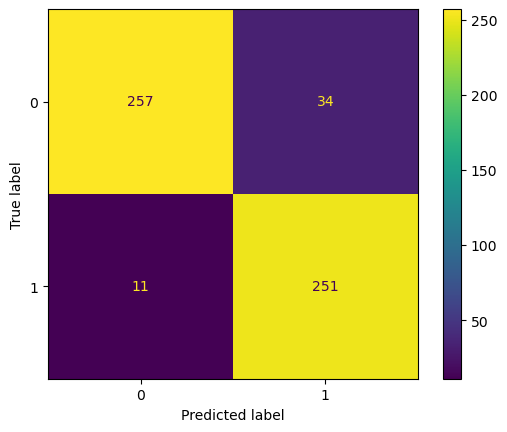

In [54]:
# Confusion matrix
cm = confusion_matrix(y_test, xgb_predict, labels = xgb.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = xgb.classes_)
disp.plot()
print("TN: ", cm[0, 0])
print("TP: ", cm[1, 1])
print("FP: ", cm[0, 1])
print("FN: ", cm[1, 0])

In [59]:
models = pd.DataFrame({"Model: ": ["Logistic Regression", "Decision Tree", "Random Forest", "SVM", "KNN", "Gradient Boosting", "XGBoost"],
                       "Accuracy": [lr_accuracy, dt_accuracy, rf_accuracy, svm_accuracy, knn_accuracy, gbc_accuracy, xgb_accuracy]})

In [60]:
models

,Model:,Accuracy
0,Logistic Regression,0.806510
1,Decision Tree,0.877034
2,Random Forest,0.915009
3,SVM,0.867993
4,KNN,0.871609
5,Gradient Boosting,0.882459
6,XGBoost,0.918626


In [61]:
models_sorted = models.sort_values(by="Accuracy", ascending=False)
models_sorted

,Model:,Accuracy
6,XGBoost,0.918626
2,Random Forest,0.915009
5,Gradient Boosting,0.882459
1,Decision Tree,0.877034
4,KNN,0.871609
3,SVM,0.867993
0,Logistic Regression,0.806510


<Axes: xlabel='Accuracy', ylabel='Model: '>

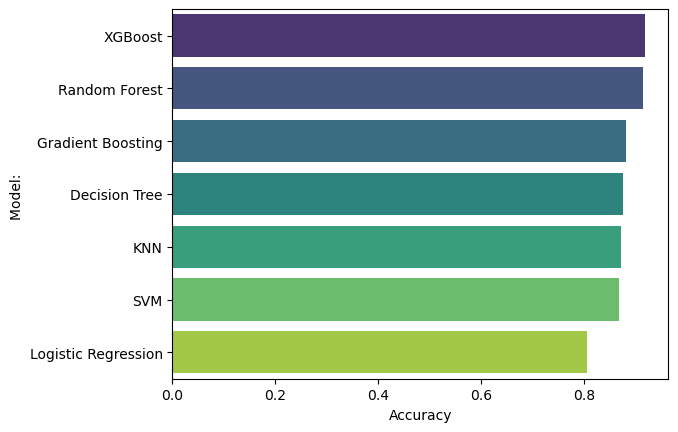

In [64]:
sns.barplot(x=models_sorted["Accuracy"], y=models_sorted["Model: "], palette="viridis")

#### Prediction on New Data

In [80]:
new_data = pd.DataFrame({'fixed acidity':7.3,
'volatile acidity':0.65,
'citric acid' :0.00,
'residual sugar':1.2,
'chlorides' :0.065,
'free sulfur dioxide':15.0,
'total sulfur dioxide' :21.0,
'density' :0.9946,
'pH': 3.39,
'sulphates' :0.47,
'alcohol' :10.0,}, index=[0])

In [66]:
new_data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.3,0.65,0.0,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0


In [68]:
# Feature scaling
test = pca.transform(st.transform(new_data))

In [78]:
predict = xgb.predict(test)
if predict == 1:
    print('Good Quality Wine')
else:
    print('Bad Quality Wine')

Good Quality Wine
